In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, cross_val_predict, GroupKFold
from sklearn.metrics import classification_report, cohen_kappa_score, confusion_matrix, f1_score
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("adult.csv")

In [3]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [5]:
df.shape

(32561, 15)

In [6]:
df.isnull().sum()        

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

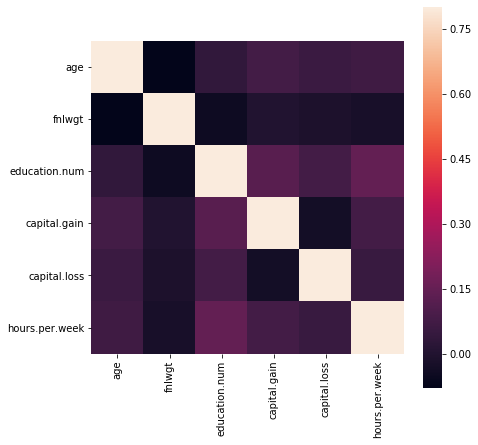

In [7]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(corrmat, vmax=.8, square=True);

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df1 = df.apply(LabelEncoder().fit_transform)
df1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,72,0,2649,11,8,6,0,1,4,0,0,91,39,39,0
1,65,4,6514,11,8,6,4,1,4,0,0,91,17,39,0
2,49,0,11175,15,9,6,0,4,2,0,0,91,39,39,0
3,37,4,7009,5,3,0,7,4,4,0,0,90,39,39,0
4,24,4,16850,15,9,5,10,3,4,0,0,90,39,39,0


In [12]:
columns = ['income']
y = df1['income']
X = df1.drop(columns, axis=1)

gb = GradientBoostingClassifier()
gb_scores = cross_val_score(gb, X, y, cv=10, scoring='accuracy')
print('The accuracy of the Gboost classifier with Label Encoding & 10 fold cross-validation is ' + str(gb_scores.mean()))

The accuracy of the Gboost classifier with Label Encoding & 10 fold cross-validation is 0.8069525833227091


In [14]:
y = df['income']
df_train_OneHot = df.drop(columns, axis=1)
df_train_OneHot = pd.get_dummies(df_train_OneHot)
df_train_OneHot.head()
X = df_train_OneHot

gb = GradientBoostingClassifier()
gb_scores = cross_val_score(gb, X, y, cv=10, scoring='accuracy')
print('The accuracy of the Gboost classifier with OneHot Encoding & 10 fold cross-validation is ' + str(gb_scores.mean()))

The accuracy of the Gboost classifier with OneHot Encoding & 10 fold cross-validation is 0.8044345329922548


In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn_scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print('The accuracy of the knn classifier with 10 fold cross-validation is ' + str(knn_scores.mean()))
print(knn_scores)

knn_cv_mean = np.mean(knn_scores)
knn_cv_variance = np.var(knn_scores)

print('Knn Mean score : ', knn_cv_mean)
print('Knn Score variance : ', knn_cv_variance)

The accuracy of the knn classifier with 10 fold cross-validation is 0.761590967555045
[0.59809641 0.97635135 0.74907862 0.75429975 0.75737101 0.75706388
 0.75737101 0.75337838 0.75583538 0.75706388]
Knn Mean score :  0.761590967555045
Knn Score variance :  0.0073239392601850434


In [16]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced', multi_class='multinomial', solver='lbfgs')

logreg_scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print('The accuracy of the logistic Regression classifier with 10 fold cross-validation is ' + str(logreg_scores.mean()))

print(logreg_scores)
logreg_cv_mean = np.mean(logreg_scores)
logreg_cv_variance = np.var(logreg_scores)

print('logreg Mean score : ', logreg_cv_mean)
print('logreg Score variance : ', logreg_cv_variance)

The accuracy of the logistic Regression classifier with 10 fold cross-validation is 0.6686612146659737
[0.39085048 0.69226044 0.7463145  0.69318182 0.6529484  0.66492629
 0.75921376 0.65571253 0.75921376 0.67199017]
logreg Mean score :  0.6686612146659737
logreg Score variance :  0.010120614140142514


In [17]:
from sklearn.naive_bayes import MultinomialNB
NB = MultinomialNB()
NB_scores = cross_val_score(NB, X, y, cv=10, scoring='accuracy')
print('The accuracy of the Random forest classifier with 10 fold cross-validation is ' + str(NB_scores.mean()))
print(NB_scores)
NB_cv_mean = np.mean(NB_scores)
NB_cv_variance = np.var(NB_scores)

print('logreg Mean score : ', NB_cv_mean)
print('logreg Score variance : ', NB_cv_variance)

The accuracy of the Random forest classifier with 10 fold cross-validation is 0.7793473742813626
[0.4494934  1.         1.         0.78869779 0.75921376 0.75921376
 0.75921376 0.75921376 0.75921376 0.75921376]
logreg Mean score :  0.7793473742813626
logreg Score variance :  0.020869841257586248


In [18]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest_scores = cross_val_score(forest, X, y, cv=10, scoring='accuracy')
print('The accuracy of the Random forest classifier with 10 fold cross-validation is ' + str(forest_scores.mean()))
print(forest_scores)
forest_cv_mean = np.mean(forest_scores)
forest_cv_variance = np.var(forest_scores)

print('forest Mean score : ', forest_cv_mean)
print('forest Score variance : ', forest_cv_variance)

The accuracy of the Random forest classifier with 10 fold cross-validation is 0.8001348729894937
[0.60853546 0.91953317 0.77334152 0.79238329 0.81541769 0.80927518
 0.82616708 0.82002457 0.82616708 0.81050369]
forest Mean score :  0.8001348729894937
forest Score variance :  0.005391983138961175


In [22]:

gb = GradientBoostingClassifier()


gb_scores = cross_val_score(gb, X, y, cv=10, scoring='accuracy')
print('The accuracy of the Random forest classifier with 10 fold cross-validation is ' + str(gb_scores.mean()))



print(gb_scores)
gb_cv_mean = np.mean(gb_scores)
gb_cv_variance = np.var(gb_scores)

print('gb Mean score : ', gb_cv_mean)
print('gb Score variance : ', gb_cv_variance)

The accuracy of the Random forest classifier with 10 fold cross-validation is 0.8043731079308298
[0.61160577 0.87684275 0.75214988 0.82002457 0.82708845 0.82340295
 0.84029484 0.83138821 0.83906634 0.82186732]
gb Mean score :  0.8043731079308298
gb Score variance :  0.004979130501607788


In [23]:
classifiers = { }
classifiers['Classifier'] = ['Knn','Logistic Regeression','Naive Bayesian','Random Forest', 'Gradient Boost']
classifiers['Mean'] = [knn_cv_mean, logreg_cv_mean, NB_cv_mean,forest_cv_mean, gb_cv_mean]
classifiers['Variance'] = [knn_cv_variance, logreg_cv_variance, NB_cv_variance,  forest_cv_variance, gb_cv_variance]
classifiers = pd.DataFrame(classifiers)
classifiers

,Classifier,Mean,Variance
0,Knn,0.761591,0.007324
1,Logistic Regeression,0.668661,0.010121
2,Naive Bayesian,0.779347,0.020870
3,Random Forest,0.800135,0.005392
4,Gradient Boost,0.804373,0.004979


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [25]:
gb = GradientBoostingClassifier()

param_grid = [
              {'n_estimators': [50,100,125,150]}]


grid = GridSearchCV(gb, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

print("Best n_estimator found for GradientBoosting Classifier:")
print(grid.best_params_)
print()

print("Scores on training set:")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()


Best n_estimator found for GradientBoosting Classifier:
{'n_estimators': 50}

Scores on training set:
0.809 (+/-0.141) for {'n_estimators': 50}
0.804 (+/-0.141) for {'n_estimators': 100}
0.803 (+/-0.144) for {'n_estimators': 125}
0.803 (+/-0.148) for {'n_estimators': 150}



In [26]:
param_grid = [{'max_depth': [3,5,7,9,11,15]}]

grid = GridSearchCV(gb, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

print("Best max_depth found for GradientBoosting Classifier:")
print(grid.best_params_)
print()

print("Scores on training set:")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()


Best max_depth found for GradientBoosting Classifier:
{'max_depth': 5}

Scores on training set:
0.804 (+/-0.141) for {'max_depth': 3}
0.807 (+/-0.151) for {'max_depth': 5}
0.807 (+/-0.140) for {'max_depth': 7}
0.806 (+/-0.142) for {'max_depth': 9}
0.802 (+/-0.143) for {'max_depth': 11}
0.797 (+/-0.143) for {'max_depth': 15}



In [27]:
gb = GradientBoostingClassifier(n_estimators= 125, max_depth = 5,learning_rate = 0.1)

param_grid = [{'max_features': [3,5,7,9]}]

grid = GridSearchCV(gb, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

print("Best max_features found for GradientBoosting Classifier:")
print(grid.best_params_)
print()

print("Scores on training set:")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

Best max_features found for GradientBoosting Classifier:
{'max_features': 3}

Scores on training set:
0.825 (+/-0.116) for {'max_features': 3}
0.820 (+/-0.153) for {'max_features': 5}
0.816 (+/-0.159) for {'max_features': 7}
0.814 (+/-0.159) for {'max_features': 9}



In [28]:
gb = GradientBoostingClassifier(n_estimators= 125, max_depth = 5,learning_rate = 0.1,max_features=5)

param_grid = [{'min_samples_split': [500,1000,1250,1500,2000]}]

grid = GridSearchCV(gb, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

print("Best min_samples_split found for GradientBoosting Classifier:")
print(grid.best_params_)
print()

print("Scores on training set:")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

Best min_samples_split found for GradientBoosting Classifier:
{'min_samples_split': 2000}

Scores on training set:
0.819 (+/-0.154) for {'min_samples_split': 500}
0.821 (+/-0.150) for {'min_samples_split': 1000}
0.818 (+/-0.154) for {'min_samples_split': 1250}
0.822 (+/-0.139) for {'min_samples_split': 1500}
0.823 (+/-0.135) for {'min_samples_split': 2000}



In [29]:
k_range = list(range(10,201,10))
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

print("Best set of parameters found:")
print(grid.best_params_)
print()

print("Scores on training set:")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

Best set of parameters found:
{'n_neighbors': 80}

Scores on training set:
0.762 (+/-0.171) for {'n_neighbors': 10}
0.770 (+/-0.159) for {'n_neighbors': 20}
0.772 (+/-0.150) for {'n_neighbors': 30}
0.774 (+/-0.144) for {'n_neighbors': 40}
0.774 (+/-0.135) for {'n_neighbors': 50}
0.774 (+/-0.128) for {'n_neighbors': 60}
0.774 (+/-0.122) for {'n_neighbors': 70}
0.774 (+/-0.118) for {'n_neighbors': 80}
0.774 (+/-0.109) for {'n_neighbors': 90}
0.773 (+/-0.105) for {'n_neighbors': 100}
0.773 (+/-0.101) for {'n_neighbors': 110}
0.773 (+/-0.096) for {'n_neighbors': 120}
0.773 (+/-0.091) for {'n_neighbors': 130}
0.773 (+/-0.088) for {'n_neighbors': 140}
0.772 (+/-0.083) for {'n_neighbors': 150}
0.772 (+/-0.081) for {'n_neighbors': 160}
0.771 (+/-0.075) for {'n_neighbors': 170}
0.771 (+/-0.072) for {'n_neighbors': 180}
0.770 (+/-0.066) for {'n_neighbors': 190}
0.769 (+/-0.061) for {'n_neighbors': 200}



In [30]:
logreg = LogisticRegression(random_state=0)
param_grid = {'C':np.linspace(0.01, 100, 25)}

grid = GridSearchCV(logreg, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

print("Best set of parameters found:")
print(grid.best_params_)
print()

print("Scores on training set:")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

Best set of parameters found:
{'C': 83.335}

Scores on training set:
0.769 (+/-0.267) for {'C': 0.01}
0.769 (+/-0.267) for {'C': 4.17625}
0.769 (+/-0.267) for {'C': 8.3425}
0.769 (+/-0.267) for {'C': 12.50875}
0.769 (+/-0.267) for {'C': 16.675}
0.769 (+/-0.267) for {'C': 20.84125}
0.769 (+/-0.267) for {'C': 25.0075}
0.769 (+/-0.267) for {'C': 29.173750000000002}
0.769 (+/-0.267) for {'C': 33.339999999999996}
0.769 (+/-0.267) for {'C': 37.506249999999994}
0.769 (+/-0.267) for {'C': 41.67249999999999}
0.769 (+/-0.267) for {'C': 45.83875}
0.769 (+/-0.267) for {'C': 50.004999999999995}
0.769 (+/-0.267) for {'C': 54.17124999999999}
0.769 (+/-0.267) for {'C': 58.3375}
0.769 (+/-0.267) for {'C': 62.50375}
0.769 (+/-0.267) for {'C': 66.67}
0.769 (+/-0.267) for {'C': 70.83625}
0.769 (+/-0.267) for {'C': 75.0025}
0.769 (+/-0.267) for {'C': 79.16875}
0.770 (+/-0.268) for {'C': 83.335}
0.769 (+/-0.267) for {'C': 87.50125}
0.769 (+/-0.267) for {'C': 91.6675}
0.769 (+/-0.267) for {'C': 95.83375}
0.7

In [31]:
NB = MultinomialNB()

param_grid = [{'alpha': [0.01, 0.1, 1.0]}]

grid = GridSearchCV(NB, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)

print("Best set of parameters found:")
print(grid.best_params_)
print()

print("Scores on training set:")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

Best set of parameters found:
{'alpha': 1.0}

Scores on training set:
0.779 (+/-0.289) for {'alpha': 0.01}
0.779 (+/-0.289) for {'alpha': 0.1}
0.779 (+/-0.289) for {'alpha': 1.0}

